In [ ]:
!unrar e /content/donnees.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/donnees.rar

Extracting  golf.csv                                                       2%  OK 
Extracting  golf_bis.csv                                                   5%  OK 
Extracting  soybean-app.csv                                               63%  OK 
Extracting  soybean-pred.csv                                             100%  OK 
All OK


##Importing necessary libraries

In [ ]:
import sklearn
import pandas as pd
import numpy as np

##Importing files

In [ ]:
golf = pd.read_csv("/content/golf.csv")
golf_bis = pd.read_csv("/content/golf_bis.csv")
soybean_app = pd.read_csv("/content/soybean-app.csv")
soybean_pred = pd.read_csv("/content/soybean-pred.csv")

##Exploratory Data Analysis

In [ ]:
golf_cols = golf.columns.tolist()
golf_bis_cols = golf_bis.columns.tolist()
soybean_app_cols = soybean_app.columns.tolist()
soybean_pred_cols = soybean_pred.columns.tolist()

In [ ]:
soybean_pred.shape

(228, 36)

##Checking for null items in the tables

In [ ]:
[item.isna().sum().sum() for item in [golf, golf_bis, soybean_app, soybean_pred]]

[0, 0, 0, 0]

In [ ]:
data = pd.concat([soybean_app, soybean_pred], axis=0)

In [ ]:
[{col:data[col].unique().tolist()} for col in data.columns.tolist()]

[{'date': ['august',
   'october',
   'september',
   'july',
   'may',
   'april',
   'june',
   '?']},
 {'plant-stand': ['normal', 'lt-normal', '?']},
 {'precip': ['gt-norm', 'norm', 'lt-norm', '?']},
 {'temp': ['norm', 'lt-norm', 'gt-norm', '?']},
 {'hail': ['yes', 'no', '?']},
 {'crop-hist': ['same-lst-two-yrs',
   'same-lst-yr',
   'same-lst-sev-yrs',
   'diff-lst-year',
   '?']},
 {'area-damaged': ['scattered',
   'low-areas',
   'whole-field',
   'upper-areas',
   '?']},
 {'severity': ['severe', 'pot-severe', '?', 'minor']},
 {'seed-tmt': ['fungicide', 'none', '?', 'other']},
 {'germination': ['80-89', 'lt-80', '?', '90-100']},
 {'plant-growth': ['abnorm', 'norm', '?']},
 {'leaves': ['abnorm', 'norm']},
 {'leafspots-halo': ['absent', '?', 'no-yellow-halos', 'yellow-halos']},
 {'leafspots-marg': ['dna', '?', 'w-s-marg', 'no-w-s-marg']},
 {'leafspot-size': ['dna', '?', 'gt-1/8', 'lt-1/8']},
 {'leaf-shread': ['absent', '?', 'present']},
 {'leaf-malf': ['absent', '?', 'present']},
 

In [ ]:
data.isin(["?"]).sum()

0

In [ ]:
data.replace('?', np.nan, inplace=True)
data.isna().sum().sum()

2337

##Converting from categorical columns to numerical ones

In [ ]:
assert soybean_pred_cols == soybean_app_cols

In [ ]:
categ_cols = data.select_dtypes(include="object").columns.tolist()
num_cols = data.select_dtypes(exclude="object").columns.tolist() # List vide

In [ ]:
cols = data.columns.tolist()
for col in cols:
  data[col] = data[col].fillna(data[col].mode().iloc[0])
data4 = data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
# Add circular transformation for date columns
encoder = LabelEncoder()
for col in categ_cols:
  data[col] = encoder.fit_transform(data[col])

data1 = data.copy()
data1["date"] = -np.cos(0.5236 * data1["date"])


data.columns = data.columns.astype(str)
data1.columns = data1.columns.astype(str)

In [ ]:
data.rename(columns={"class \t\t":"class"}, inplace=True)
data1.rename(columns={"class \t\t":"class"}, inplace=True)

##Check for skewness

In [ ]:
import scipy

skew_df = pd.DataFrame(data1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data1[feature]))
skew_df['Absolute skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute skew,Skewed
0,date,-0.074762,0.074762,False
1,plant-stand,-0.286950,0.286950,False
2,precip,1.218883,1.218883,True
3,temp,-0.721896,0.721896,True
4,hail,-1.614426,1.614426,True
5,crop-hist,-0.148812,0.148812,False
6,area-damaged,0.071231,0.071231,False
7,severity,-0.055646,0.055646,False
8,seed-tmt,-0.034896,0.034896,False
9,germination,0.378940,0.378940,False


In [ ]:
data1.describe()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,...,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.098088,0.571010,0.436310,1.300146,0.814056,1.732064,1.426061,0.780381,0.726208,0.806735,...,0.029283,2.267936,0.742313,0.831625,0.098097,0.093704,0.913616,0.055637,1.103953,8.295754
std,0.749808,0.495295,0.758123,0.891035,0.389347,0.933231,1.209091,0.551002,0.549328,0.849779,...,0.168721,1.216919,1.136341,0.374473,0.297663,0.291630,0.281136,0.229387,0.370502,5.511153
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.499998,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.500000
50%,0.000004,1.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.000000
75%,0.866028,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,13.000000
max,1.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,18.000000


In [ ]:
#Unskew data
for col in skew_df.query("Skewed == True")["Feature"].values:
  data[col] = np.log1p(1. + data[col])
  data1[col] = np.log1p(1. + data1[col])

<ipython-input-236-8c2171a5c654>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, kde=True, fit=scipy.stats.norm)
<ipython-input-236-8c2171a5c654>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(1+target), kde=True, fit=scipy.stats.norm)


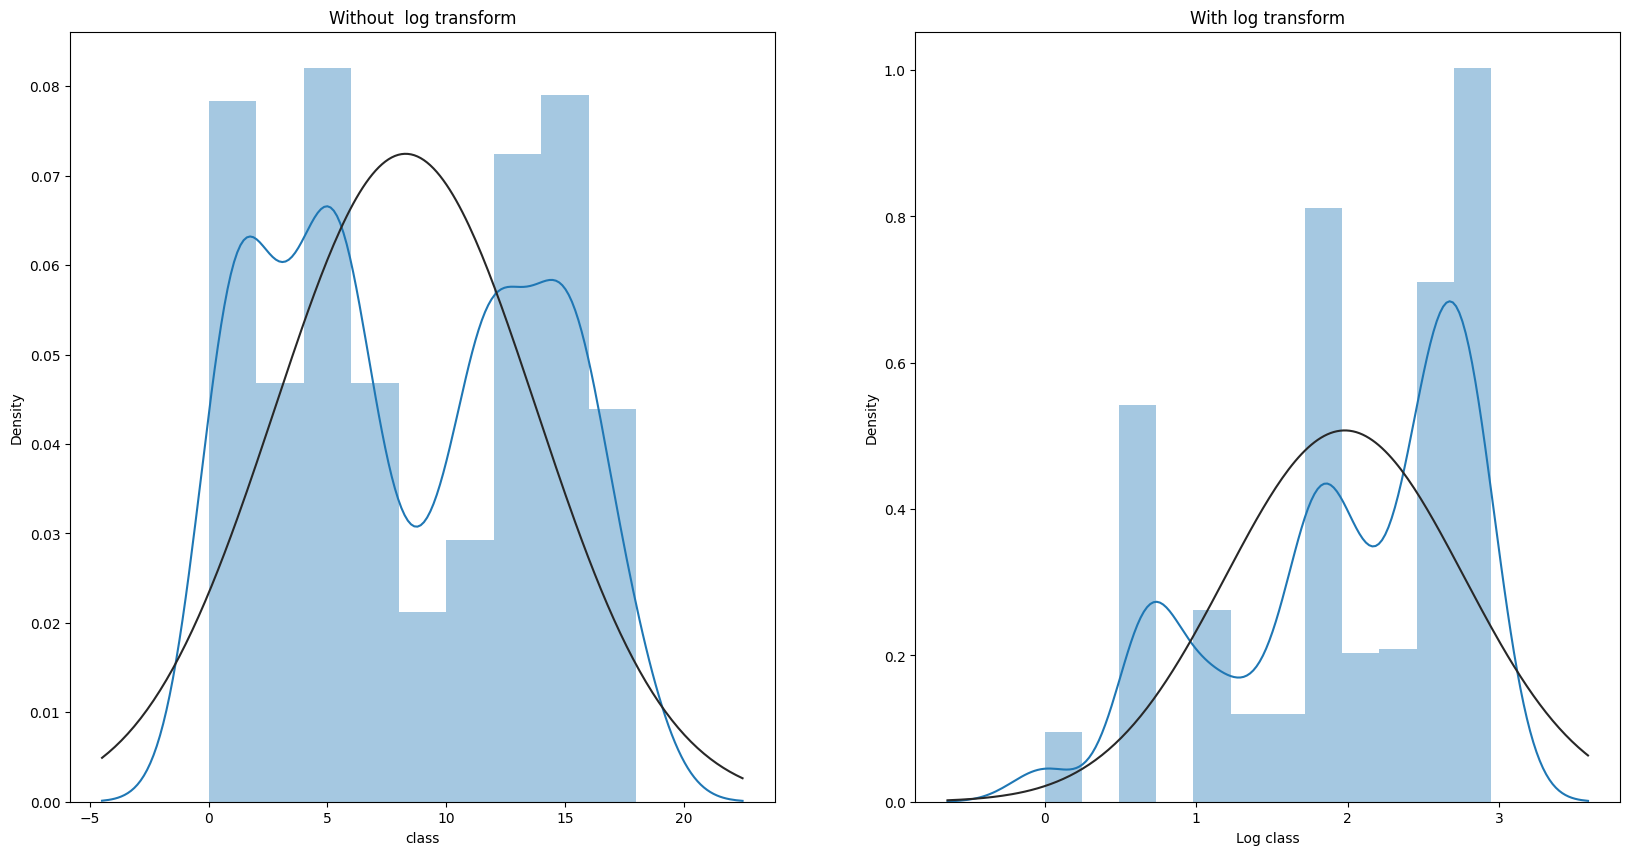

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("Without  log transform")
plt.xlabel("class")

plt.subplot(1, 2, 2)
sns.distplot(np.log(1+target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log class")
plt.title("With log transform")

plt.show()

## Better not to log transform, since it would skew more the data

In [ ]:
data1.columns.tolist()

['date',
 'plant-stand',
 'precip',
 'temp',
 'hail',
 'crop-hist',
 'area-damaged',
 'severity',
 'seed-tmt',
 'germination',
 'plant-growth',
 'leaves',
 'leafspots-halo',
 'leafspots-marg',
 'leafspot-size',
 'leaf-shread',
 'leaf-malf',
 'leaf-mild',
 'stem',
 'lodging',
 'stem-cankers',
 'canker-lesion',
 'fruiting-bodies',
 'external-decay',
 'mycelium',
 'int-discolor',
 'sclerotia',
 'fruit-pods',
 'fruit-spots',
 'seed',
 'mold-growth',
 'seed-discolor',
 'seed-size',
 'shriveling',
 'roots',
 'class \t\t']

In [ ]:
data1["date"].unique()

array([-8.66024792e-01,  8.66028465e-01,  1.00000000e+00, -4.99997879e-01,
        5.00004241e-01, -1.00000000e+00,  3.67320510e-06])

In [ ]:
[{col:data1[col].unique().tolist()} for col in data1.columns.tolist()]

[{'date': [-0.6666666666666666,
   0.6666666666666666,
   1.0,
   -0.3333333333333333,
   0.3333333333333333,
   -1.0,
   0.0,
   1.3333333333333333]},
 {'plant-stand': [0.0, -1.0, 1.0]},
 {'precip': [0.0, 2.0, 1.0, 3.0]},
 {'temp': [0.0, -0.5, -1.0, 0.5]},
 {'hail': [0.0, -1.0, 1.0]},
 {'crop-hist': [0.0, 0.5, -0.5, -1.0, 1.0]},
 {'area-damaged': [0.0,
   -0.3333333333333333,
   0.6666666666666666,
   0.3333333333333333,
   1.0]},
 {'severity': [1.0, 0.0, 2.0, -1.0]},
 {'seed-tmt': [-1.0, 0.0, 2.0, 1.0]},
 {'germination': [-0.5, 0.5, 1.0, 0.0]},
 {'plant-growth': [-1.0, 0.0, 1.0]},
 {'leaves': [0.0, 1.0]},
 {'leafspots-halo': [-1.0, 2.0, 0.0, 1.0]},
 {'leafspots-marg': [-1.0, 0.5, 0.0, -0.5]},
 {'leafspot-size': [-1.0, 2.0, 0.0, 1.0]},
 {'leaf-shread': [0.0, 2.0, 1.0]},
 {'leaf-malf': [0.0, 2.0, 1.0]},
 {'leaf-mild': [0.0, 3.0, 1.0, 2.0]},
 {'stem': [0.0, 1.0, 2.0]},
 {'lodging': [0.0, -1.0, 1.0]},
 {'stem-cankers': [-1.0, 0.5, -0.5, 0.0, 1.0]},
 {'canker-lesion': [-2.0, 0.0, -1.0, 1.

In [ ]:
target = data1["class"]

## Installing pycaret

In [ ]:
!pip install -U pycaret

In [ ]:
!pycaret --version

/bin/bash: line 1: pycaret: command not found


In [ ]:
from pycaret.classification import setup, compare_models

_ = setup(data=data1, target="class", index=False)

,Description,Value
0,Session id,1781
1,Target,class
2,Target type,Regression
3,Original data shape,"(1139, 36)"
4,Transformed data shape,"(1139, 36)"
5,Transformed train set shape,"(797, 36)"
6,Transformed test set shape,"(342, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.4953,2.3178,1.4762,0.9253,0.2551,0.1901,0.2480
xgboost,Extreme Gradient Boosting,0.6957,2.8513,1.6621,0.9071,0.2927,0.2471,0.1040
rf,Random Forest Regressor,0.7689,3.1157,1.7318,0.8992,0.3014,0.2877,0.3950
lightgbm,Light Gradient Boosting Machine,1.0132,3.4866,1.8490,0.8872,0.3361,0.3666,0.5480
gbr,Gradient Boosting Regressor,1.2435,4.3406,2.0677,0.8597,0.3674,0.4476,0.1370
dt,Decision Tree Regressor,0.5509,4.3864,2.0671,0.8584,0.3390,0.2061,0.0330
ada,AdaBoost Regressor,2.5992,10.3938,3.2084,0.6626,0.6115,0.9914,0.0870
knn,K Neighbors Regressor,1.9761,10.9837,3.2545,0.6450,0.4824,0.5626,0.0320
ridge,Ridge Regression,2.7507,12.8129,3.5686,0.5826,0.6078,1.0053,0.0290
br,Bayesian Ridge,2.7525,12.8270,3.5707,0.5821,0.6079,1.0058,0.0280


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=1781)

##FROM SCRATCH IMPLEMENTATION OF A DECISION TREE

In [ ]:
class Node():
    def __init__(self, feature=None, threshold=None, left=None, right=None, info_gain=None, *,value=None):
        ''' constructor '''

        # for decision node
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split: int = 2, max_depth: int = 100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
      n_samples, n_features = X.shape
      n_labels = len(np.unique(y))
      if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
          leaf_value = self._most_common_label(y)
          return Node(value=leaf_value)

      feat_idxs = np.random.choice(n_features, self.n_features, replace=True)

      #find the best split
      best_feature, best_thresh = self._best_split(X, y, feat_idxs)

      #create child nodes
      left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
      #print("Left idxs are ",left_idxs)
      left = self._grow_tree(X[left_idxs], y[left_idxs], depth+1)
      right = self._grow_tree(X[right_idxs], y[right_idxs], depth+1)
      return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(X_column, y, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr
            return split_idx, split_threshold

      #The node with the highest entropy is the one with the most mixed elements, we want to choose the feature and threshold that lead to the least entropy
    def _information_gain(self, X_column, y, threshold: float):
        #parent entropy
        parent_entropy = self._entropy(y)

        #create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the information gain
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idx = np.argwhere(X_column <= split_thresh).flatten()
        right_idx = np.argwhere(X_column > split_thresh).flatten()

        return left_idx, right_idx

    def _entropy(self, y):
        hist = np.bincount(y) #occurences of y eleemnts --> [n, m, 0, 0, k,0...] (1 has occured n times for example)
        ps = hist / len(y)
        return -np.sum([p*np.log(p) for p in ps if p>0]) # we throw null elements

    def _most_common_label(self, y):
      from collections import Counter
      counter = Counter(y)
      if len(counter) == 0:
          # Handle the case where y is empty
          return 2
      value = counter.most_common(1)[0][0]
      return value

    def predict(self, X):
      return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node: Node):
        if node.is_leaf_node():
          return node.value

        if x[node.feature] <= node.threshold:
          return self._traverse_tree(x, node.left)

        return self._traverse_tree(x, node.right)

def cross_val_score(model: DecisionTree, train_data: pd.DataFrame, target: pd.Series, cv: int) -> None:
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    #target = pd.DataFrame(target)
    kf = KFold(n_splits=cv)
    scores = []
    for train_index, test_index in kf.split(train_data):
        X_train, X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        #print(len(y_train) + len(y_test) == len(target))
        model.fit(X_train.values, y_train.values)
        y_pred = model.predict(X_test.values)

        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    avg_score = np.mean(scores)
    return avg_score


if __name__ == "__main__":

  train_data = data4.loc[:, data.columns != 'class']
  target = data4["class"]

  assert target.shape[0] == train_data.shape[0]

  model = DecisionTree(max_depth=800)
  cv_score = cross_val_score(model, train_data, target, cv=5)
  print("Cross-validation score without cosine transformation:", cv_score)

  '''
  train_data["data"] = -np.cos(0.5236 * train_data["date"])

  train_data = data1.loc[:, data1.columns != 'class']
  model = DecisionTree(max_depth=200)
  cv_score = cross_val_score(model, train_data, target, cv=10)
  print("Cross-validation score with cosine transformation:", cv_score)

  '''

Cross-validation score without cosine transformation: 0.8536603692571918


## Tree Visualization

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model.fit(train_data, target)

DecisionTreeClassifier(max_depth=5)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


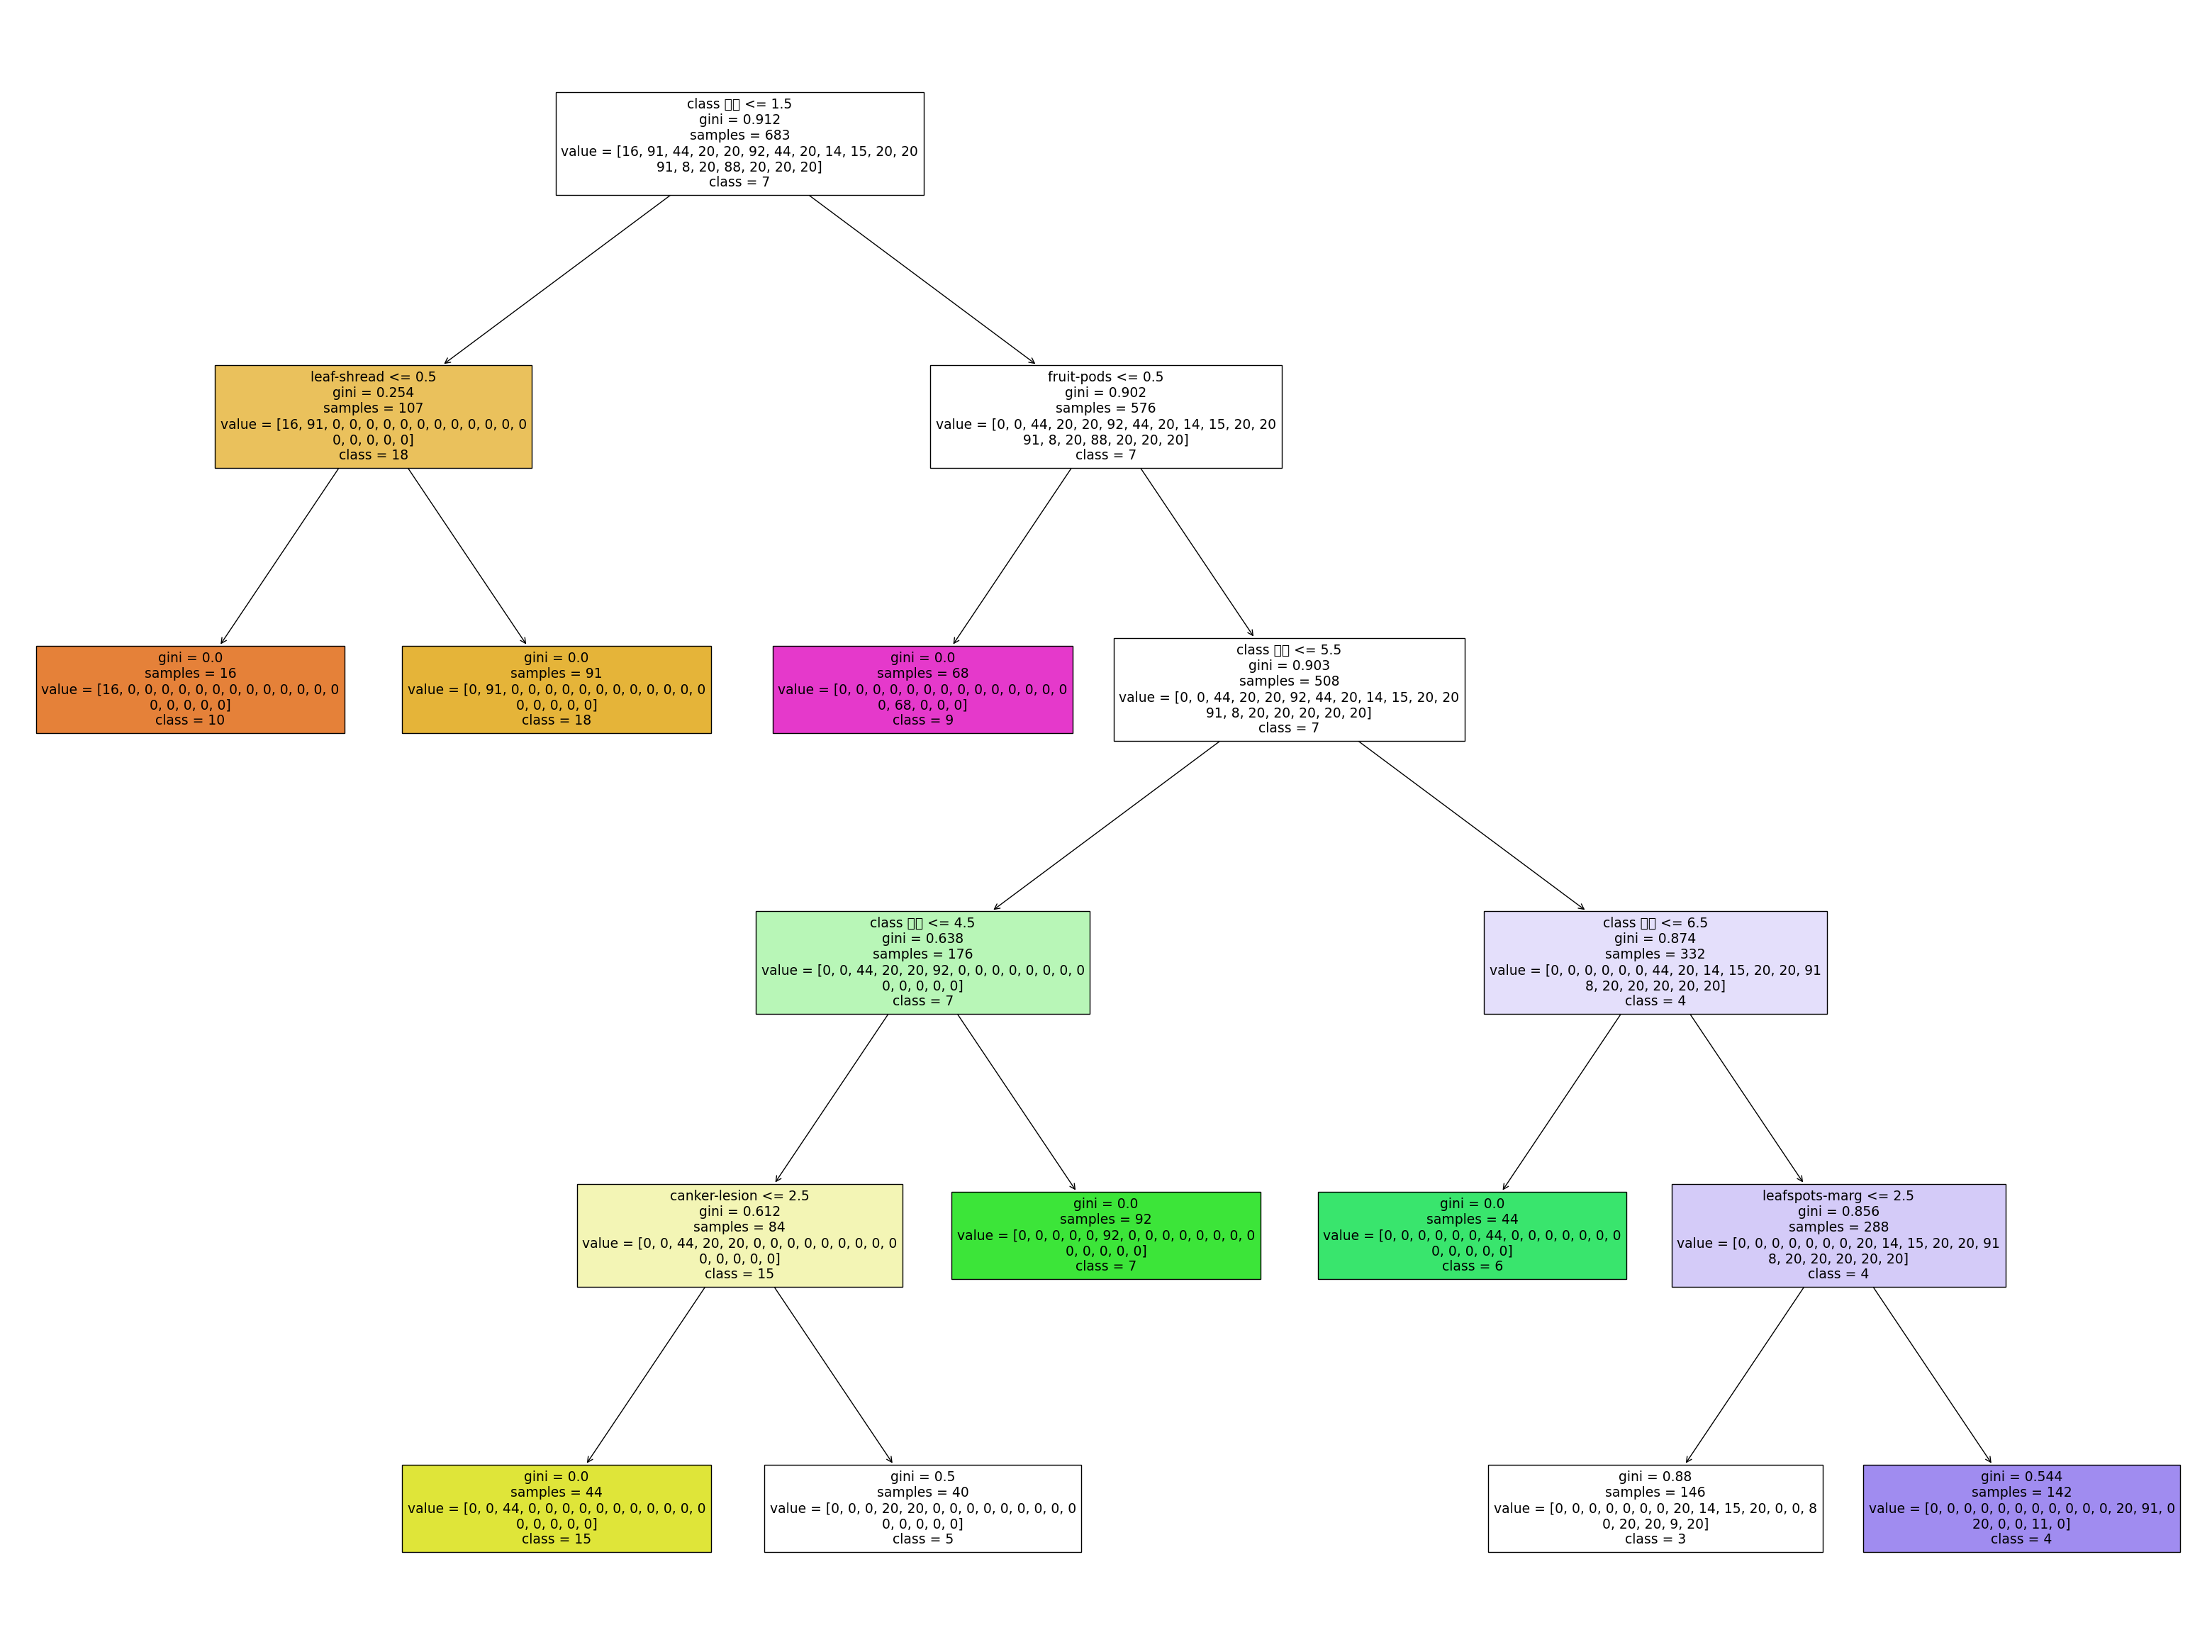

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

data.columns = data.columns.astype(str)
fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model, feature_names=data.columns.tolist(), class_names = target.astype(str).unique().tolist(), filled=True)